# k- Nearest Neighbour classifier

# https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import pairwise_distances
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [ ]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [ ]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [ ]:
print("\nDistribution of DEATH_EVENT:")
print(df["DEATH_EVENT"].value_counts())


Distribution of DEATH_EVENT:
0    203
1     96
Name: DEATH_EVENT, dtype: int64


In [ ]:
# Features (X) and Target (y)
X = df.drop("DEATH_EVENT", axis=1)  # Features
y = df["DEATH_EVENT"]  # Target


In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Standardize the features (important for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Standardize the features (important for distance calculations)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop("DEATH_EVENT", axis=1))

# Function to calculate Euclidean Distance between two rows
def euclidean_distance(row1, row2):
    return np.sqrt(np.sum((row1 - row2) ** 2))

# Example: Calculate Euclidean Distance between the first two patients
distance = euclidean_distance(df_scaled[0], df_scaled[1])
print("\nEuclidean Distance between Patient 1 and Patient 2:", distance)



Euclidean Distance between Patient 1 and Patient 2: 8.274657736294413


In [ ]:
# Calculate pairwise Euclidean distances for the entire dataset
from sklearn.metrics.pairwise import euclidean_distances

pairwise_distances = euclidean_distances(df_scaled)
print("\nPairwise Euclidean Distances (first 5 rows and columns):")
print(pairwise_distances[:5, :5])


Pairwise Euclidean Distances (first 5 rows and columns):
[[ 0.          8.27465774  3.37511907  3.99725913  5.38239368]
 [ 8.27465774  0.          8.64248557  8.45793495 10.11185185]
 [ 3.37511907  8.64248557  0.          3.76010235  5.52866707]
 [ 3.99725913  8.45793495  3.76010235  0.          5.90421324]
 [ 5.38239368 10.11185185  5.52866707  5.90421324  0.        ]]


Euclidean Distance Calculation:

A custom function euclidean_distance is defined to calculate the Euclidean Distance between two rows (patients).

The euclidean_distances function from sklearn.metrics.pairwise is used to compute pairwise distances for the entire dataset.



In [ ]:
def manhattan_distance(row1, row2):
    return np.sum(np.abs(row1 - row2))

# Example: Calculate Manhattan Distance between the first two patients
distance = manhattan_distance(df_scaled[0], df_scaled[1])
print("\nManhattan Distance between Patient 1 and Patient 2:", distance)


Manhattan Distance between Patient 1 and Patient 2: 14.996438253876526


In [ ]:
# Calculate pairwise Manhattan distances for the entire dataset
from sklearn.metrics.pairwise import manhattan_distances

pairwise_distances = manhattan_distances(df_scaled)
print("\nPairwise Manhattan Distances (first 5 rows and columns):")
print(pairwise_distances[:5, :5])


Pairwise Manhattan Distances (first 5 rows and columns):
[[ 0.         14.99643825  7.43059318  8.89662743 14.15352017]
 [14.99643825  0.         15.30571721 13.52532101 23.22419115]
 [ 7.43059318 15.30571721  0.          8.34885154 14.30721123]
 [ 8.89662743 13.52532101  8.34885154  0.         12.18912085]
 [14.15352017 23.22419115 14.30721123 12.18912085  0.        ]]


Manhattan Distance Calculation:

A custom function manhattan_distance is defined to calculate the Manhattan Distance between two rows (patients).

The manhattan_distances function from sklearn.metrics.pairwise is used to compute pairwise distances for the entire dataset.

In [ ]:
# Function to calculate Minkowski Distance between two rows
def minkowski_distance(row1, row2, p):
    return np.sum(np.abs(row1 - row2) ** p) ** (1 / p)

# Example: Calculate Minkowski Distance between the first two patients
p = 3  # You can change this value to experiment
distance = minkowski_distance(df_scaled[0], df_scaled[1], p)
print(f"\nMinkowski Distance (p={p}) between Patient 1 and Patient 2:", distance)


Minkowski Distance (p=3) between Patient 1 and Patient 2: 7.633587772163998


In [ ]:
# Calculate pairwise Minkowski distances for the entire dataset
from sklearn.metrics.pairwise import pairwise_distances

pairwise_distances = pairwise_distances(df_scaled, metric="minkowski", p=p)
print(f"\nPairwise Minkowski Distances (p={p}, first 5 rows and columns):")
print(pairwise_distances[:5, :5])


Pairwise Minkowski Distances (p=3, first 5 rows and columns):
[[0.         7.63358777 2.76287043 3.14350553 4.0907447 ]
 [7.63358777 0.         8.06369203 8.06518523 8.57243755]
 [2.76287043 8.06369203 0.         2.9767413  4.09368844]
 [3.14350553 8.06518523 2.9767413  0.         5.06670461]
 [4.0907447  8.57243755 4.09368844 5.06670461 0.        ]]


Minkowski Distance Calculation:

A custom function minkowski_distance is defined to calculate the Minkowski Distance between two rows (patients).

The pairwise_distances function from sklearn.metrics.pairwise is used to compute pairwise distances for the entire dataset with the metric="minkowski" and a specified p value.

C:\Users\admin\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


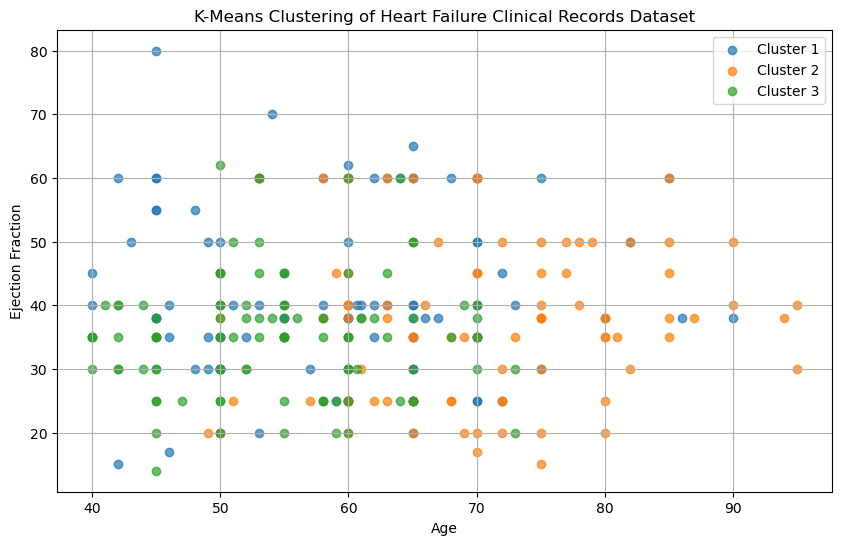

In [ ]:
# Perform K-Means Clustering
n_clusters = 3  # Number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df["Cluster"] = kmeans.fit_predict(df_scaled)

# Visualize the clusters using a scatter plot
plt.figure(figsize=(10, 6))

# Plot each cluster with a different color
for cluster in range(n_clusters):
    cluster_data = df[df["Cluster"] == cluster]
    plt.scatter(
        cluster_data["age"],  # X-axis: Age
        cluster_data["ejection_fraction"],  # Y-axis: Ejection Fraction
        label=f"Cluster {cluster + 1}",  # Label for the legend
        alpha=0.7,  # Transparency of points
    )

# Add labels and title
plt.xlabel("Age")
plt.ylabel("Ejection Fraction")
plt.title("K-Means Clustering of Heart Failure Clinical Records Dataset")
plt.legend()  # Show legend
plt.grid(True)  # Add grid
plt.show()

C:\Users\admin\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


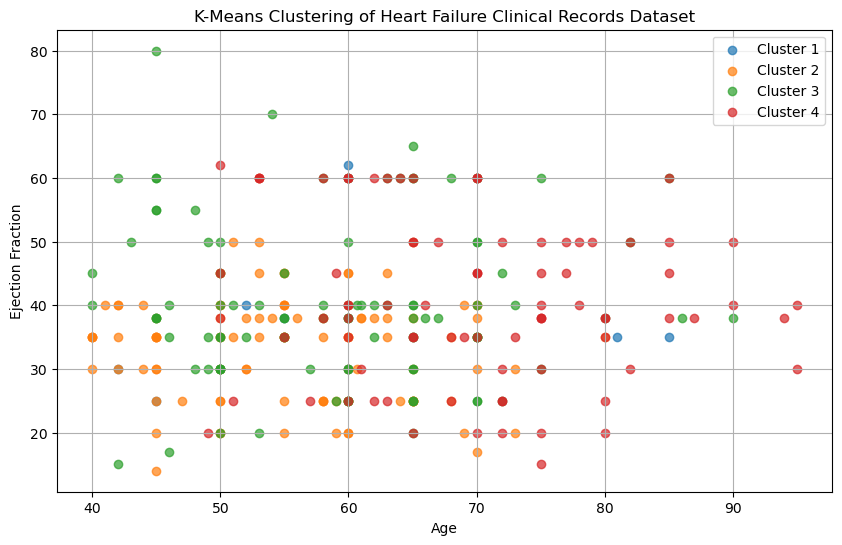

In [ ]:
# Perform K-Means Clustering
n_clusters = 4  # Number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df["Cluster"] = kmeans.fit_predict(df_scaled)

# Visualize the clusters using a scatter plot
plt.figure(figsize=(10, 6))

# Plot each cluster with a different color
for cluster in range(n_clusters):
    cluster_data = df[df["Cluster"] == cluster]
    plt.scatter(
        cluster_data["age"],  # X-axis: Age
        cluster_data["ejection_fraction"],  # Y-axis: Ejection Fraction
        label=f"Cluster {cluster + 1}",  # Label for the legend
        alpha=0.7,  # Transparency of points
    )

# Add labels and title
plt.xlabel("Age")
plt.ylabel("Ejection Fraction")
plt.title("K-Means Clustering of Heart Failure Clinical Records Dataset")
plt.legend()  # Show legend
plt.grid(True)  # Add grid
plt.show()

C:\Users\admin\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


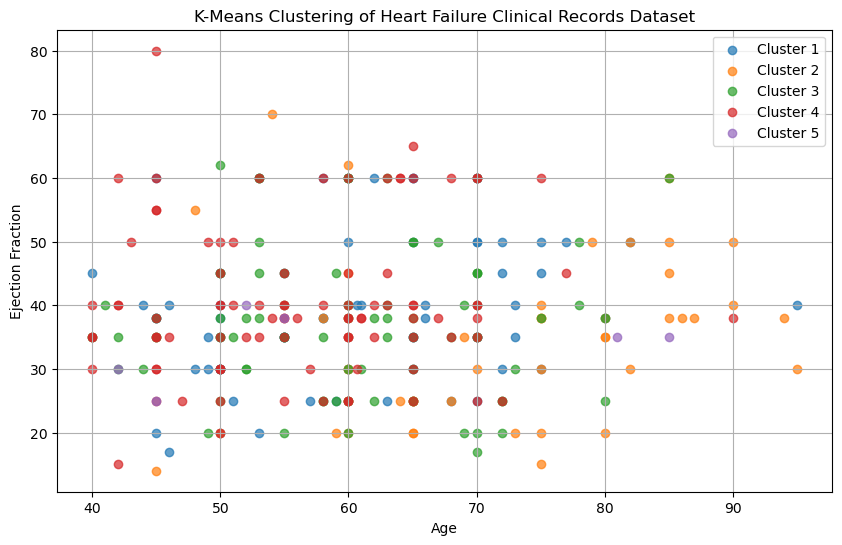

In [ ]:
# Perform K-Means Clustering
n_clusters = 5  # Number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df["Cluster"] = kmeans.fit_predict(df_scaled)

# Visualize the clusters using a scatter plot
plt.figure(figsize=(10, 6))

# Plot each cluster with a different color
for cluster in range(n_clusters):
    cluster_data = df[df["Cluster"] == cluster]
    plt.scatter(
        cluster_data["age"],  # X-axis: Age
        cluster_data["ejection_fraction"],  # Y-axis: Ejection Fraction
        label=f"Cluster {cluster + 1}",  # Label for the legend
        alpha=0.7,  # Transparency of points
    )

# Add labels and title
plt.xlabel("Age")
plt.ylabel("Ejection Fraction")
plt.title("K-Means Clustering of Heart Failure Clinical Records Dataset")
plt.legend()  # Show legend
plt.grid(True)  # Add grid
plt.show()

C:\Users\admin\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warni

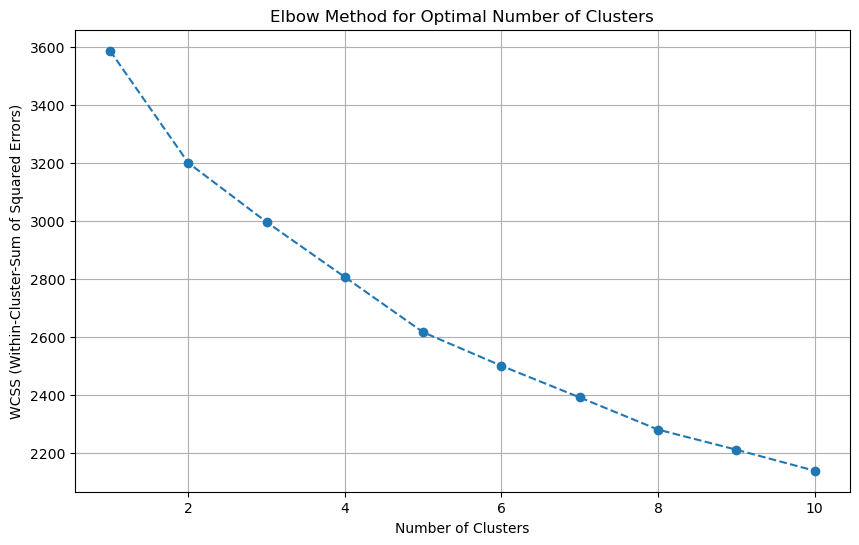

In [ ]:
#Within-Cluster-Sum of Squared Errors (WCSS)
# Calculate WCSS for different numbers of clusters
wcss = []  # Within-Cluster-Sum of Squared Errors
max_clusters = 10  # Maximum number of clusters to try

for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS

# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), wcss, marker="o", linestyle="--")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS (Within-Cluster-Sum of Squared Errors)")
plt.title("Elbow Method for Optimal Number of Clusters")
plt.grid(True)
plt.show()

How to Interpret the Elbow Curve:
Elbow Point:

The point where the rate of decrease in WCSS slows down significantly is considered the optimal number of clusters.

This is the "elbow" of the curve.

No Clear Elbow:

If the curve is smooth and there is no clear elbow, you may need to use other methods (e.g., Silhouette Score) to determine the optimal number of clusters.



Gap Statistic
Compares the WCSS of your data to the WCSS of a reference dataset (random noise). The optimal number of clusters is where the gap is largest.

python


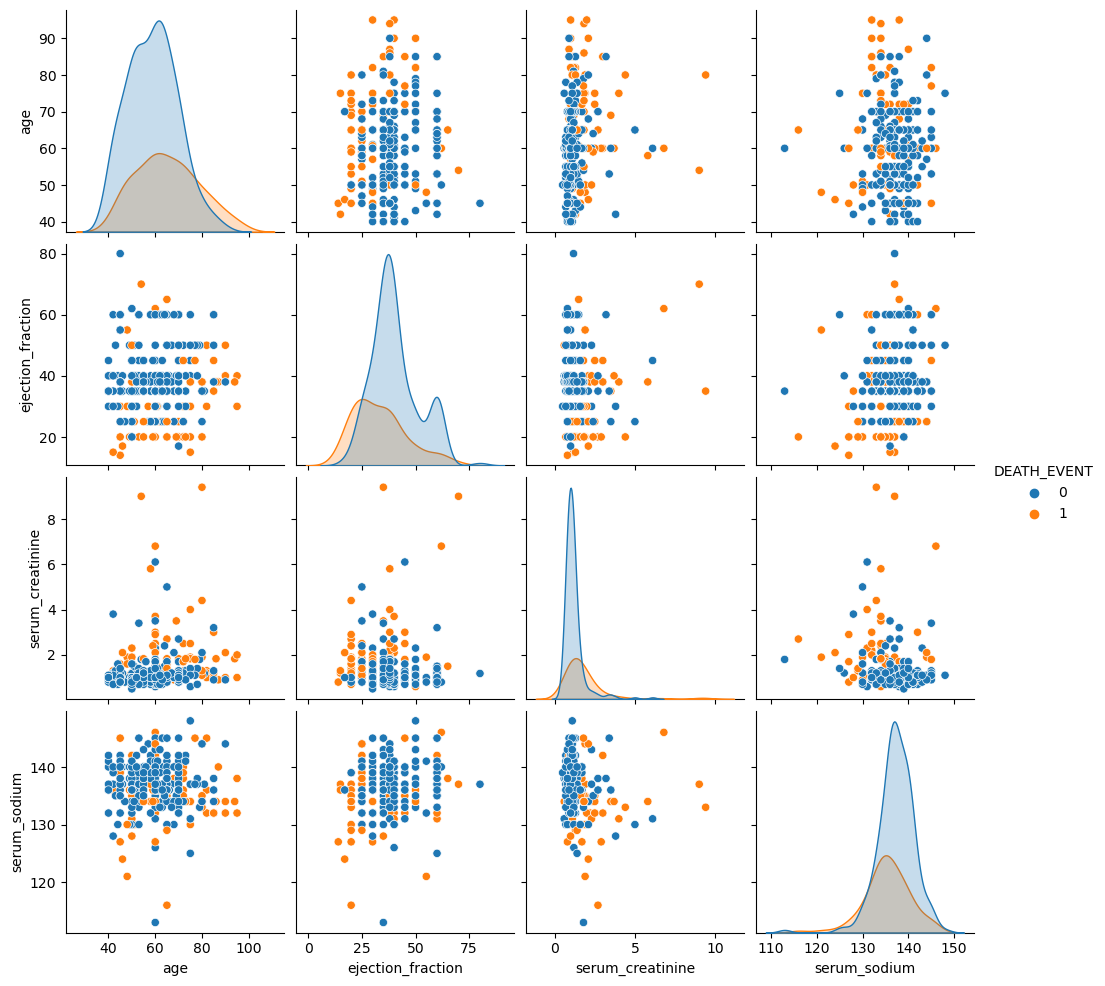

In [ ]:
sns.pairplot(df, hue='DEATH_EVENT', vars=['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium'])
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select features (exclude the target variable)
X = df.drop('DEATH_EVENT', axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

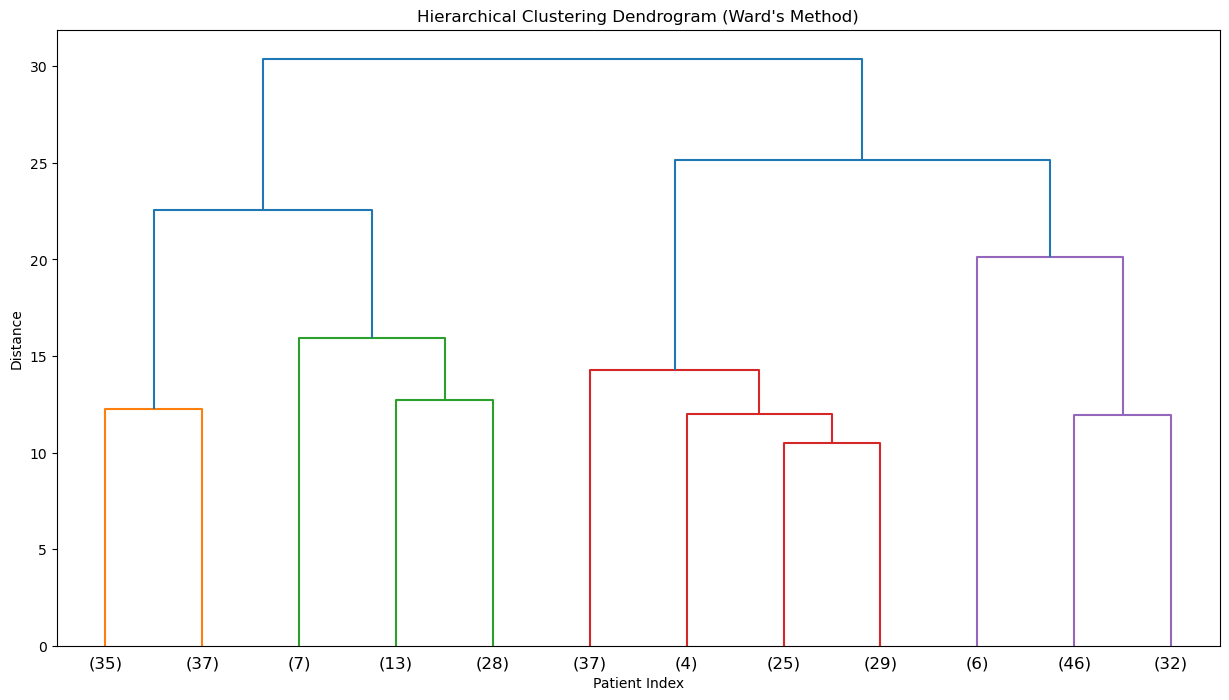

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Compute linkage matrix
Z = linkage(X_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(15, 8))
dendrogram(Z, truncate_mode='lastp', p=12, show_leaf_counts=True)
plt.title("Hierarchical Clustering Dendrogram (Ward's Method)")
plt.xlabel("Patient Index")
plt.ylabel("Distance")
plt.show()

Dendrogram: Shows hierarchical clustering of patients based on clinical features. Patients in similar clusters may share risk factors.

In [ ]:
from sklearn.decomposition import PCA
from scipy.spatial import Voronoi, voronoi_plot_2d

In [ ]:
# Reduce to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

<Figure size 1200x800 with 0 Axes>

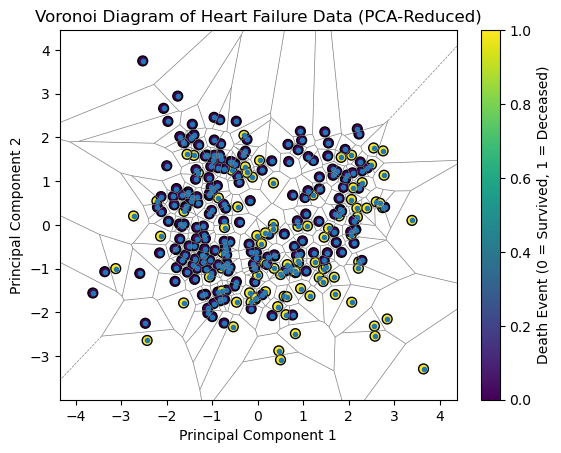

In [ ]:
# Compute Voronoi regions
vor = Voronoi(X_pca)

# Plot Voronoi diagram colored by survival status (DEATH_EVENT)
plt.figure(figsize=(12, 8))
voronoi_plot_2d(vor, show_points=True, show_vertices=False, line_colors='gray', line_width=0.5)

# Color points by survival status (0 = survived, 1 = deceased)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolors='k', s=50)
plt.colorbar(scatter, label='Death Event (0 = Survived, 1 = Deceased)')
plt.title("Voronoi Diagram of Heart Failure Data (PCA-Reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

Key Observations
Each Voronoi region represents the area "closest" to a patient in PCA space.

Colors indicate survival status (DEATH_EVENT). Clusters of similar colors suggest groups of patients with similar outcomes.

This visualization helps identify spatial patterns in high-dimensional data after dimensionality reduction.